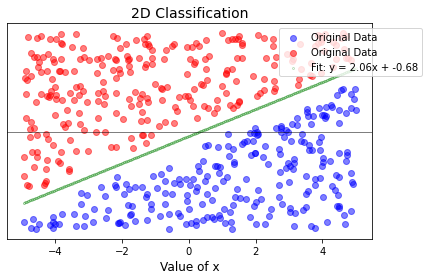

In [14]:
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
import math
df=pd.read_csv("dataset2.csv")
x = df['x'].values
y = df['y'].values
m = df['label'].values

def binary_cross_loss(params, x,y, m): 
    delta = 10**(-5)
    a,b,c = params 
    z=a*x+b*y+c
    m_hat=1/(1+np.exp(z))
    mse=-(m*np.log10(m_hat + delta)+(1-m)*np.log10(1-m_hat+delta))
    return np.mean(mse)

initial_guess = [0,0,0] 
result_mse = minimize(binary_cross_loss, initial_guess, args=(x, y,m)) 
a,b,c = result_mse.x 


import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETUP DATA ---
# X_point is the threshold (red dot)
x_plottter = np.linspace(min(x),max(x),500)
Y=(-a*x_plottter-c)/b
y_label=m
# x contains your data values
# indices = np.arange(len(x)) # Not needed if plotting strictly on X-axis

plt.scatter(x[m==0],y[m==0],color="blue",alpha=0.5,label='Original Data')
plt.scatter(x[m==1],y[m==1],color="red",alpha=0.5,label='Original Data')
plt.scatter(x_plottter, Y, color='green', alpha=1,s=0.05,linewidth=2, label=f'Fit: y = {-a/b:.2f}x + {-c/b:.2f}') 

# --- 3. PLOT THRESHOLD POINT ---

# --- 4. FORMATTING ---
plt.title('2D Classification', fontsize=14) 
plt.xlabel('Value of x', fontsize=12)

# Hide the Y-axis entirely since it contains no info
plt.gca().get_yaxis().set_visible(False)

# Optional: Add a subtle horizontal line for the axis
plt.axhline(y=0, color='black', linewidth=0.5, zorder=1)

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) 
plt.tight_layout()
plt.show()

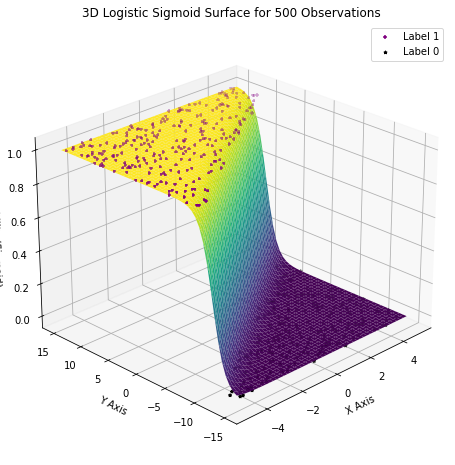

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 1. SETUP PARAMETERS (Based on your observations)
n_obs = 500
# m and c should be defined in your workspace (e.g., m=2.06, c=-0.68)

# 2. GENERATE THE SIGMOID SURFACE
# We create a grid over the x and y coordinates
x_range = np.linspace(df['x'].min(), df['x'].max(), 50)
y_range = np.linspace(df['y'].min(), df['y'].max(), 50)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# Formula for distance from the line: z = y - (mx + c)
# This z is then passed into the sigmoid: 1 / (1 + exp(-z))
Z_mesh = 1 / (1 + np.exp(-(Y_mesh - (-a/b * X_mesh - c/b))))

# 3. CREATE THE 3D FIGURE
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sigmoid Surface (Probability Surface)
# It will look like an 'S' curve stretched over the 2D plane
surf = ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=1, antialiased=True)

# 4. PLOT SCATTER POINTS IN 3D
# Label 1: Purple '+' markers plotted at Z=1 (Actual Label)
mask1 = (y_label == 1)
ax.scatter(df.loc[mask1, 'x'], df.loc[mask1, 'y'], np.ones(mask1.sum()), 
           color="purple", marker="+", s=10, label='Label 1')

# Label 0: Black '*' markers plotted at Z=0 (Actual Label)
mask0 = (y_label == 0)
ax.scatter(df.loc[mask0, 'x'], df.loc[mask0, 'y'], np.zeros(mask0.sum()), 
           color="black", marker="*", s=10, label='Label 0')

# 5. FORMATTING
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Probability (Sigmoid)')
ax.set_title(f'3D Logistic Sigmoid Surface for {n_obs} Observations')

# Adjust the camera angle to see the transition clearly
ax.view_init(elev=25, azim=-135)
plt.legend()
plt.show()

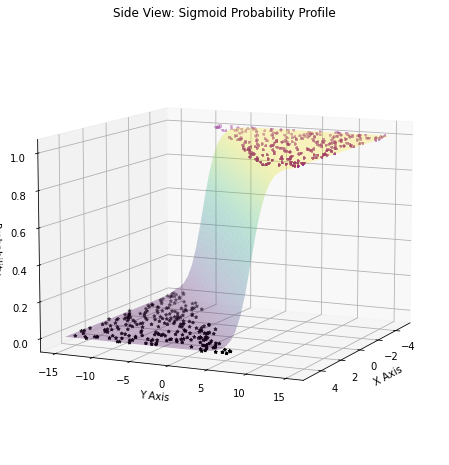

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the previous 3D setup code is already run
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot Surface and Data (Same as before)
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=0.3)
ax.scatter(df.loc[mask1, 'x'], df.loc[mask1, 'y'], 1, color="purple", marker="+", s=10)
ax.scatter(df.loc[mask0, 'x'], df.loc[mask0, 'y'], 0, color="black", marker="*", s=10)

# 2. ADJUST VIEW FOR SIDE PROFILE
# Elevation (elev): Height above the XY plane (0 is ground level)
# Azimuth (azim): Rotation around the Z axis
ax.view_init(elev=10, azim=25) # Standard Side View (X-Z plane focus)

# 3. FORMATTING
ax.set_title("Side View: Sigmoid Probability Profile")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Probability')

plt.show()

1. For dataset no. 3

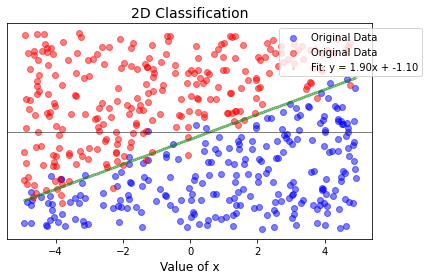

In [53]:
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
import math
df=pd.read_csv("dataset3.csv")
x = df['x'].values
y = df['y'].values
m = df['label'].values

def binary_cross_loss(params, x,y, m): 
    delta = 10**(-5)
    a,b,c = params 
    z=a*x+b*y+c
    m_hat=1/(1+np.exp(z))
    mse=-(m*np.log10(m_hat + delta)+(1-m)*np.log10(1-m_hat+delta))
    return np.mean(mse)

initial_guess = [0,0,0] 
result_mse = minimize(binary_cross_loss, initial_guess, args=(x, y,m)) 
a,b,c = result_mse.x 


import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETUP DATA ---
# X_point is the threshold (red dot)
x_plottter = np.linspace(min(x),max(x),500)
Y=(-a*x_plottter-c)/b
y_label=m
# x contains your data values
# indices = np.arange(len(x)) # Not needed if plotting strictly on X-axis

plt.scatter(x[m==0],y[m==0],color="blue",alpha=0.5,label='Original Data')
plt.scatter(x[m==1],y[m==1],color="red",alpha=0.5,label='Original Data')
plt.scatter(x_plottter, Y, color='green', alpha=1,s=0.05,linewidth=2, label=f'Fit: y = {-a/b:.2f}x + {-c/b:.2f}') 

# --- 3. PLOT THRESHOLD POINT ---

# --- 4. FORMATTING ---
plt.title('2D Classification', fontsize=14) 
plt.xlabel('Value of x', fontsize=12)

# Hide the Y-axis entirely since it contains no info
plt.gca().get_yaxis().set_visible(False)

# Optional: Add a subtle horizontal line for the axis
plt.axhline(y=0, color='black', linewidth=0.5, zorder=1)

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) 
plt.tight_layout()
plt.show()

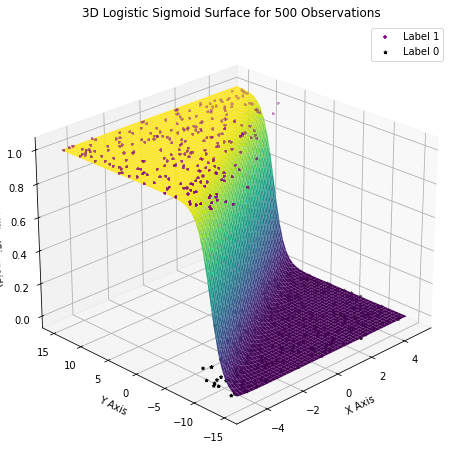

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 1. SETUP PARAMETERS (Based on your observations)
n_obs = 500
# m and c should be defined in your workspace (e.g., m=2.06, c=-0.68)

# 2. GENERATE THE SIGMOID SURFACE
# We create a grid over the x and y coordinates
x_range = np.linspace(df['x'].min(), df['x'].max(), 50)
y_range = np.linspace(df['y'].min(), df['y'].max(), 50)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# Formula for distance from the line: z = y - (mx + c)
# This z is then passed into the sigmoid: 1 / (1 + exp(-z))
Z_mesh = 1 / (1 + np.exp(-(Y_mesh - (-a/b * X_mesh - c/b))))

# 3. CREATE THE 3D FIGURE
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sigmoid Surface (Probability Surface)
# It will look like an 'S' curve stretched over the 2D plane
surf = ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=1, antialiased=True)

# 4. PLOT SCATTER POINTS IN 3D
# Label 1: Purple '+' markers plotted at Z=1 (Actual Label)
mask1 = (y_label == 1)
ax.scatter(df.loc[mask1, 'x'], df.loc[mask1, 'y'], np.ones(mask1.sum()), 
           color="purple", marker="+", s=10, label='Label 1')

# Label 0: Black '*' markers plotted at Z=0 (Actual Label)
mask0 = (y_label == 0)
ax.scatter(df.loc[mask0, 'x'], df.loc[mask0, 'y'], np.zeros(mask0.sum()), 
           color="black", marker="*", s=10, label='Label 0')

# 5. FORMATTING
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Probability (Sigmoid)')
ax.set_title(f'3D Logistic Sigmoid Surface for {n_obs} Observations')

# Adjust the camera angle to see the transition clearly
ax.view_init(elev=25, azim=-135)
plt.legend()
plt.show()

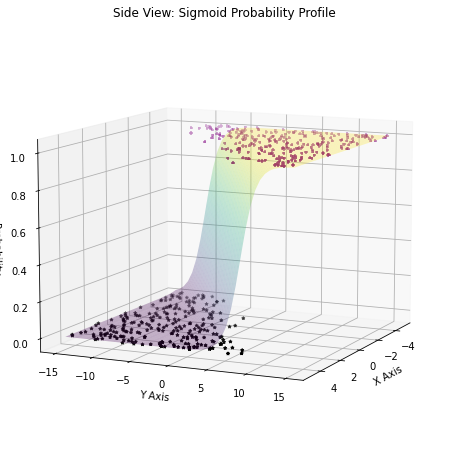

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the previous 3D setup code is already run
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot Surface and Data (Same as before)
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=0.3)
ax.scatter(df.loc[mask1, 'x'], df.loc[mask1, 'y'], 1, color="purple", marker="+", s=10)
ax.scatter(df.loc[mask0, 'x'], df.loc[mask0, 'y'], 0, color="black", marker="*", s=10)

# 2. ADJUST VIEW FOR SIDE PROFILE
# Elevation (elev): Height above the XY plane (0 is ground level)
# Azimuth (azim): Rotation around the Z axis
ax.view_init(elev=10, azim=25) # Standard Side View (X-Z plane focus)

# 3. FORMATTING
ax.set_title("Side View: Sigmoid Probability Profile")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Probability')

plt.show()